# Исследование объявлений о продаже квартир

**Описание проекта**

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. В проекте учимся определять рыночную стоимость объектов недвижимости.
Установим параметры для построения автоматизированной системы: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
# выведем общую информацию
data.info() # 23699 строк, 22 столбца

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
# Выведем первые 10 строк
data.head(10)# int-float-float-int- locality_name - string

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# и последние 10 строк
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


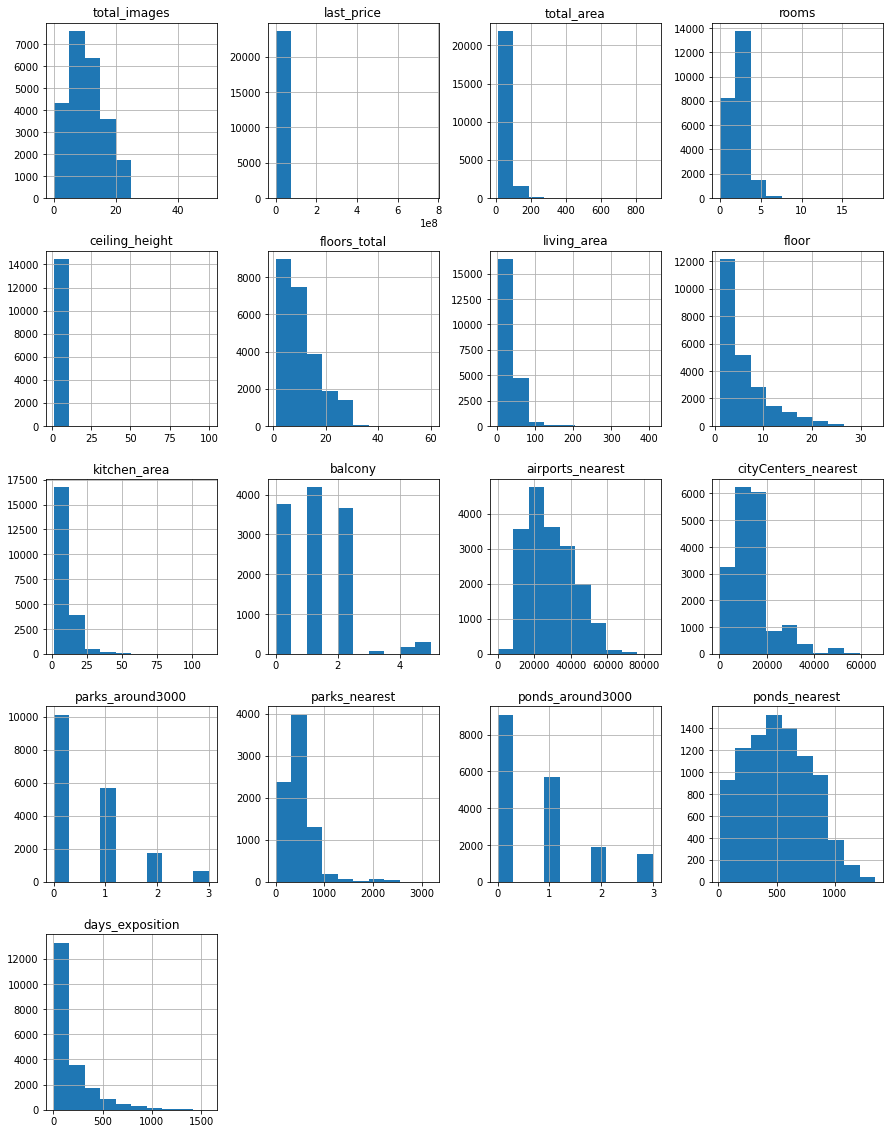

In [5]:
#выведем в виде гистрограмм
data.hist(figsize=(15, 20));

In [6]:
# можно вывести количество значений определенного столбца в порядке убывания
print(data['ceiling_height'].value_counts())
# или его пределы. Интересно, в каком здании высота потолков достигает 100 метров? 
print(data['ceiling_height'].min(), data['ceiling_height'].max()) 
#data['ceiling_height'].hist(figsize=(30, 10))

2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64
1.0 100.0


In [7]:
# выведем еще дополнительную информацию
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [8]:
# Дубликатов нет
data.duplicated().sum()
#data['is_apartment'].unique()

0

### Предобработка данных

2.1. Найдем и изучим пропущенные значения в столбцах:
o Определим, в каких столбцах есть пропуски.
o Заполним пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, 
в его квартире их нет. Такие пропуски правильно заменить на 0. Если логичную замену предложить невозможно, то оставим эти 
значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать.
o В ячейке с типом markdown укажем причины, которые могли привести к пропускам в данных.

In [9]:
# Выведём количество пропущенных значений для каждого столбца.
print(data.isna().sum())
#print(data['balcony'])

# Сразу удаляю строки с пустыми значениями - без населённого пункта 
data =  data.dropna(subset=['locality_name'])
#print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [10]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

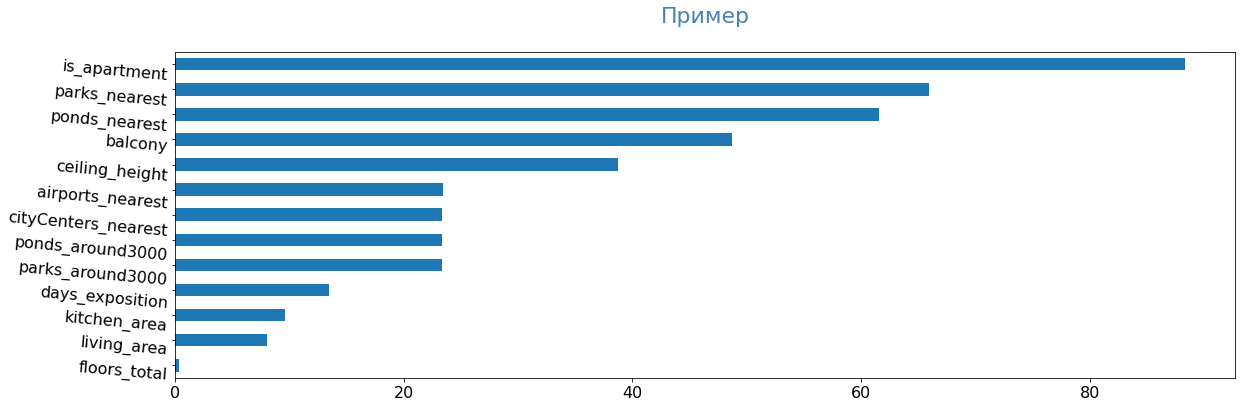

In [11]:
pass_value_barh(data)

In [12]:
# После заполнения синтетическими данными столбцов, стоит провести проверку на корректность значений всех наших площадей, 
# т.к. есть (коридоры, сан.узлы, балконы)
#     total_area*0.9 <= (living_area + kitchen_area)
# если алгоритм приводит к появлению аномалий, стоит подумать над его содержимым
import warnings
warnings.filterwarnings('ignore')

# что делать с пропусками в жилой площади -  остальное заполняем медианой по населённому пункту
# living_area жилая площадь в квадратных метрах (м²) 
#3
for kutak in data['locality_name'].unique():
    data.loc[(data['locality_name']==kutak) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[data['locality_name']==kutak, 'living_area'].median()

pass_value_barh(data['living_area'])

# kitchen_area площадь кухни в квадратных метрах (м²) - для отсутствующих значений возьмем среднее 

for kutak2 in data['living_area'].unique():
    data.loc[(data['living_area']==kutak2) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[data['living_area']==kutak2, 'kitchen_area'].median()

# Добавил
data['total_area_09'] = data['total_area']*0.9
data['check']= data['kitchen_area']+data['living_area']
area_chek = data.query('total_area_09 <= check') #.sortvalues('flat_class')
data.drop(data.loc[data['total_area_09']<=data['check']].index, inplace=True)
data.drop('total_area_09', axis=1, inplace=True)
data.drop('check', axis=1, inplace=True)

# остальные пропуски 100 шт - удалим
data =  data.dropna(subset=['living_area'])
data =  data.dropna(subset=['kitchen_area'])

# total_area*0.9 <= (living_area + kitchen_area)
#data = data.query('total_area * 0.9 <= kitchen_area + living_area ')
print(data.isna().sum())
#data.info()

пропусков не осталось :) 
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8412
floors_total               64
living_area                 0
floor                       0
is_apartment            19524
studio                      0
open_plan                   0
kitchen_area                0
balcony                 10590
locality_name               0
airports_nearest         5084
cityCenters_nearest      5061
parks_around3000         5060
parks_nearest           14525
ponds_around3000         5060
ponds_nearest           13624
days_exposition          3023
dtype: int64


In [13]:
# После заполнения синтетическими данными, стоит провести проверку на корректность значений по 
# условию (этажность дома не м.б. ниже этажности квартиры)
# ['floors_total'] < ['floor']

# floors_total всего этажей в доме. Пропуски логично заменить на 1. 
data['floors_total'] = data['floors_total'].fillna(1)

pass_value_barh(data['floors_total'])


пропусков не осталось :) 


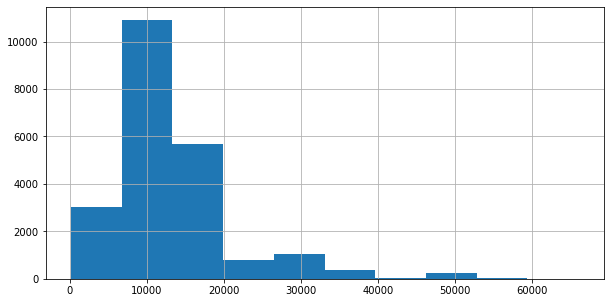

In [14]:
# Проблема: Не изучено распределение пропусков по городам до заполнения значений в ['city_сenters_nearest']
# к каким населенным пунктам относятся и оценить степень влияния пропусков на дальнейший анализ (будут мешать или нет)

# 1. По пропускам в столбцах «nearest» мы их никак не заполняем. Это картографические данные, которые если мы 
# заполним медианой то получим искаженные данные. Никак их не трогаем.
# Slack: Можно заменить медианой по всему датасету. Это не сильно важные параметры, не нужно тратить на них много времени.
# Разве что для расстояния до центра можно сделать заполнение с группировкой по населенному пункту.

# расстояние до центра города (м)
# было data['cityCenters_nearest']=data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())

data['cityCenters_nearest']=data['cityCenters_nearest'].groupby(data['locality_name']).fillna(data['cityCenters_nearest'].median())
data['cityCenters_nearest'].hist(figsize=(10, 5));

In [15]:
# заполним пропуски высоты потолков медианным значением
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())

# is_apartment это булев тип. Заменяем на ложь
data['is_apartment'] = data['is_apartment'].fillna(False)
#data['is_apartment'] = data['is_apartment'].fillna(value=False) - не работает
#data['is_apartment'] = data['is_apartment'].where((data.is_apartment == 0), False, data.is_apartment) - не работает
for t in data['is_apartment'].unique():
    data.loc[data['is_apartment']==0]=data.loc[data['is_apartment']==False]
    
# если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0
# balcony  
data['balcony']=data['balcony'].fillna(value=0)

# расстояние до ближайшего аэропорта в метрах (м)
data['airports_nearest']=data['airports_nearest'].fillna(data['airports_nearest'].median())

# число парков в радиусе 3 км
data['parks_around3000']=data['parks_around3000'].fillna(data['parks_around3000'].median())
# расстояние до ближайшего парка (м)
data['parks_nearest']=data['parks_nearest'].fillna(data['parks_nearest'].median())
# число водоёмов в радиусе 3 км
data['ponds_around3000']=data['ponds_around3000'].fillna(data['ponds_around3000'].median())
# расстояние до ближайшего водоёма (м)
data['ponds_nearest']=data['ponds_nearest'].fillna(data['ponds_nearest'].median())

print(data.isna().sum())

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3023
dtype: int64


In [16]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22144.000000,2.214400e+04,22144.000000,22144.000000,22144.000000,22144.000000,22144.00000,22144.000000,22144.000000,22144.000000,22144.000000,22144.000000,22144.000000,22144.000000,22144.000000,22144.000000,19121.000000
mean,9.954751,6.626607e+06,61.262101,2.109149,2.718202,10.573564,33.98472,5.856440,10.431045,0.601201,28407.749729,14001.706422,0.471866,466.219698,0.592576,508.288611,183.405470
std,5.681385,1.104859e+07,35.686069,1.065679,0.730254,6.537834,21.02838,4.831836,5.501203,0.966055,11147.334323,7642.018111,0.748223,199.997256,0.885593,172.474637,220.908481
min,0.000000,1.219000e+04,18.000000,0.000000,1.000000,1.000000,2.00000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.500000e+06,41.000000,1.000000,2.600000,5.000000,19.00000,2.000000,7.100000,0.000000,21134.250000,10934.750000,0.000000,454.000000,0.000000,502.000000,45.000000
50%,10.000000,4.700000e+06,53.000000,2.000000,2.650000,9.000000,30.20000,4.000000,9.100000,0.000000,26822.000000,13123.000000,0.000000,454.000000,0.000000,502.000000,98.000000
75%,14.000000,6.862030e+06,70.000000,3.000000,2.700000,15.000000,41.50000,8.000000,11.850000,1.000000,34506.000000,15305.250000,1.000000,454.000000,1.000000,502.000000,235.000000
max,50.000000,7.630000e+08,900.000000,19.000000,32.000000,60.000000,409.70000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [17]:
# check
data[data['total_area']*0.9 <= (data ['living_area']+data ['kitchen_area'])][['total_area'
                                                                                  ,'living_area','kitchen_area']]

,total_area,living_area,kitchen_area


<AxesSubplot:>

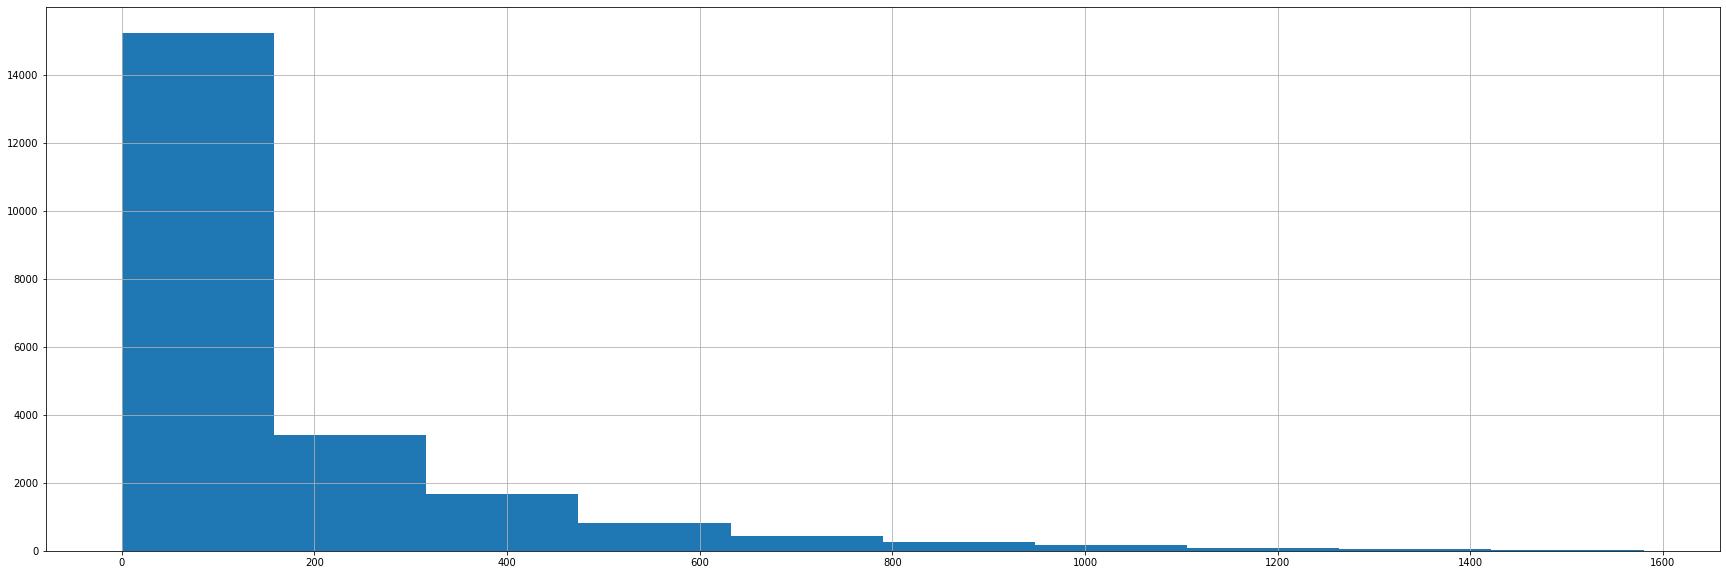

In [18]:
# days_exposition - сколько дней было размещено объявление (от публикации до снятия)
#data['first_day_exposition'].hist(figsize=(30, 10))
data['days_exposition']=data['days_exposition'].fillna(value=0)
data['days_exposition'].hist(figsize=(30, 10))
# Slack: Вижу прямую взаимосвязь пропусков с датой публикации, предполагаю, что это квартиры, которые не продали.
# Пропуски в days_exposition можно не заполнять, достаточно исследовать как они распределены относительно даты 
# публикации и составить гипотезу о том, как они появляются.
# Пропуск решил заполнить нулем. 

In [19]:
# посмотрим как теперь выглядят данные
data.sample(10)
# можно и распределение посмотреть
#data['is_apartment'].unique()
#data['balcony'].value_counts().sort_values()
#data['floor'].value_counts().sort_values()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17314,9,5150000.0,43.00,2017-09-03T00:00:00,1,2.80,20.0,20.00,19,False,...,8.00,0.0,Санкт-Петербург,15654.0,7682.0,1.0,725.0,0.0,502.0,353.0
9099,3,2750000.0,36.05,2018-02-01T00:00:00,1,2.65,17.0,15.54,11,False,...,9.37,0.0,посёлок Мурино,26822.0,13123.0,0.0,454.0,0.0,502.0,278.0
21160,10,4950000.0,55.00,2017-06-08T00:00:00,1,2.65,5.0,24.70,1,False,...,6.70,0.0,Санкт-Петербург,22211.0,3614.0,1.0,670.0,1.0,1066.0,25.0
23593,14,3399000.0,35.00,2017-12-10T00:00:00,1,2.70,18.0,17.00,7,False,...,10.00,2.0,деревня Кудрово,26822.0,13123.0,0.0,454.0,0.0,502.0,123.0
18960,11,7300000.0,76.70,2018-08-29T00:00:00,4,2.65,3.0,51.00,3,False,...,7.10,0.0,Санкт-Петербург,22272.0,3677.0,1.0,650.0,0.0,502.0,9.0
10030,8,1200000.0,32.00,2017-12-12T00:00:00,1,2.65,5.0,17.00,1,False,...,8.50,0.0,Волхов,26822.0,13123.0,0.0,454.0,0.0,502.0,42.0
12836,0,4450000.0,54.60,2016-06-28T00:00:00,2,2.65,12.0,30.00,2,False,...,10.30,0.0,Санкт-Петербург,15760.0,15976.0,1.0,719.0,0.0,502.0,574.0
2996,17,2590000.0,31.50,2017-05-30T00:00:00,1,2.53,5.0,17.80,5,False,...,5.20,0.0,посёлок Стрельна,28320.0,23491.0,1.0,687.0,0.0,502.0,64.0
2482,15,10990000.0,82.60,2018-02-13T00:00:00,2,2.60,12.0,39.90,5,False,...,13.80,1.0,Санкт-Петербург,43558.0,13138.0,0.0,454.0,0.0,502.0,34.0
5391,10,1430000.0,46.60,2018-12-10T00:00:00,2,2.60,5.0,29.20,3,False,...,5.30,0.0,Приозерск,26822.0,13123.0,0.0,454.0,0.0,502.0,80.0


2.2.	Рассмотрим типы данных в каждом столбце:
o	Найдем столбцы, в которых нужно изменить тип данных.
o	Преобразуем тип данных в выбранных столбцах.
o	В ячейке с типом markdown поясним, почему нужно изменить тип данных.

Этажи и балконы имеют целые значения, им можно присвоить int
Число парков и число водоемов в радиусе 3 км тоже целочисленный тип

In [20]:
# попытка сделать через цикл for 
#for x in ['floors_total', 'balcony', 'parks_around3000','ponds_around3000']:
#    data[x].astype('int', errors='ignore')
    
data['floors_total']=data['floors_total'].astype('int')
data['balcony']=data['balcony'].astype('int')
data['parks_around3000']=data['parks_around3000'].astype('int', errors='ignore')
data['ponds_around3000']=data['ponds_around3000'].astype('int', errors='ignore')
data.info() 
# data['floors_total'] = data['floors_total'].astype(int, errors='ignore')#.to_frame()
#data['floors_total'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22144 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22144 non-null  int64  
 1   last_price            22144 non-null  float64
 2   total_area            22144 non-null  float64
 3   first_day_exposition  22144 non-null  object 
 4   rooms                 22144 non-null  int64  
 5   ceiling_height        22144 non-null  float64
 6   floors_total          22144 non-null  int64  
 7   living_area           22144 non-null  float64
 8   floor                 22144 non-null  int64  
 9   is_apartment          22144 non-null  bool   
 10  studio                22144 non-null  bool   
 11  open_plan             22144 non-null  bool   
 12  kitchen_area          22144 non-null  float64
 13  balcony               22144 non-null  int64  
 14  locality_name         22144 non-null  object 
 15  airports_nearest   

In [21]:
# дату публикации поменяем
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10915,10,3850000.0,50.00,2016-08-31,4,2.50,5,36.0,1,False,...,5.0,0,Санкт-Петербург,13984.0,15063.0,1,622.0,0,502.0,792.0
3476,8,6200000.0,61.40,2017-09-08,2,2.65,16,31.7,6,False,...,12.6,0,Санкт-Петербург,42012.0,14515.0,1,97.0,0,502.0,148.0
332,1,3300000.0,32.90,2018-11-01,1,2.65,12,17.9,7,False,...,6.2,0,Санкт-Петербург,47694.0,16122.0,0,454.0,0,502.0,7.0
23177,10,13800000.0,159.00,2019-04-13,5,2.65,6,95.0,5,False,...,21.0,0,Санкт-Петербург,27248.0,5950.0,2,516.0,1,344.0,0.0
4327,10,15000000.0,95.00,2017-06-27,3,2.65,20,53.0,1,False,...,16.0,0,Санкт-Петербург,40417.0,12120.0,2,159.0,0,502.0,49.0
17122,6,9211000.0,79.23,2018-02-01,3,2.65,25,47.0,19,False,...,13.9,0,Санкт-Петербург,43074.0,11831.0,0,454.0,0,502.0,318.0
16884,0,1500000.0,33.00,2018-10-03,1,2.00,5,20.0,5,False,...,6.0,0,Выборг,26822.0,13123.0,0,454.0,0,502.0,6.0
23566,6,11703000.0,126.50,2017-06-15,3,2.65,6,60.9,4,False,...,14.9,0,Санкт-Петербург,53520.0,18013.0,0,454.0,2,287.0,244.0
8904,10,3600000.0,52.00,2017-08-19,3,2.65,15,34.0,4,False,...,6.2,2,Санкт-Петербург,32930.0,11095.0,2,213.0,1,964.0,64.0
18040,1,5500000.0,62.60,2019-03-12,3,2.50,9,45.5,5,False,...,6.2,0,Санкт-Петербург,46135.0,19706.0,0,454.0,0,502.0,0.0


2.3.	Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. 

In [22]:
# обработаем название населённого пункта

# приводим к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()
# Заменяем е на ё
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)
# заменяем 
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'городской поселок')
print(data['locality_name'].unique())

['санкт-петербург' 'поселок шушары' 'городской поселок янино-1'
 'поселок парголово' 'поселок мурино' 'ломоносов' 'сертолово' 'петергоф'
 'пушкин' 'деревня кудрово' 'колпино' 'гатчина' 'деревня федоровское'
 'выборг' 'кронштадт' 'кировск' 'деревня новое девяткино'
 'поселок металлострой' 'городской поселок лебяжье'
 'городской поселок сиверский' 'поселок молодцово'
 'городской поселок кузьмоловский' 'садовое товарищество новая ропша'
 'павловск' 'деревня пикколово' 'всеволожск' 'волхов' 'кингисепп'
 'приозерск' 'сестрорецк' 'деревня куттузи' 'поселок аннино'
 'деревня заклинье' 'поселок торковичи' 'поселок первомайское'
 'красное село' 'поселок понтонный' 'сясьстрой' 'деревня старая'
 'деревня лесколово' 'поселок новый свет' 'село путилово' 'ивангород'
 'мурино' 'сланцы' 'шлиссельбург' 'никольское' 'зеленогорск'
 'сосновый бор' 'деревня оржицы' 'деревня кальтино' 'кудрово'
 'поселок романовка' 'поселок бугры' 'городской поселок рощино' 'кириши'
 'луга' 'волосово' 'отрадное' 'село павло

In [23]:
# check
data['locality_name'].nunique()

304

2.4.	Найдем и устраним редкие и выбивающиеся значения. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуем обработать аномалии в этом и других столбцах.

o	Если природа аномалии понятна и данные действительно искажены, то восстановим корректное значение.

o	В противном случае удалим редкие и выбивающиеся значения.

2.65    9058
2.50    3356
2.60    1577
2.70    1477
3.00    1046
        ... 
4.90       1
3.76       1
2.49       1
2.89       1
4.65       1
Name: ceiling_height, Length: 173, dtype: int64


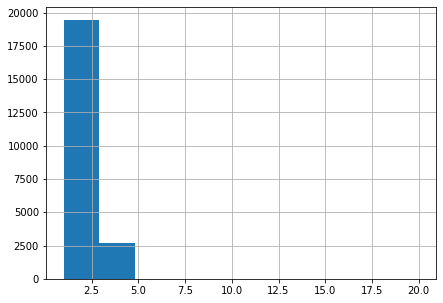

In [24]:
# ceiling_height высота потолков выше 21 метра вряд ли бывает. Уменьшим на 10. 
data.loc[(data['ceiling_height'] >= 21), 'ceiling_height'] = data['ceiling_height']*0.1
         
print(data['ceiling_height'].value_counts())
data['ceiling_height'].hist(figsize=(7, 5));

In [25]:
print(data['ceiling_height'].unique())

[ 2.7   2.65  3.03  2.5   2.67  2.56  3.05  2.75  2.6   2.9   2.8   2.55
  3.    3.2   2.61  3.25  3.45  2.77  2.85  2.64  2.57  4.15  3.3   2.71
  4.    2.47  2.73  2.84  3.1   2.34  3.4   3.5   3.06  2.72  2.54  2.51
  2.78  2.76  2.58  2.52  5.2   2.87  2.66  2.59  2.    2.45  3.6   2.92
  3.11  3.13  3.8   3.15  3.55  3.16  3.62  3.12  2.53  2.74  2.96  5.3
  2.79  2.95  4.06  2.94  3.7   3.82  3.54  3.53  2.83  4.7   2.4   3.38
  3.01  5.6   3.65  3.9   3.18  3.35  2.3   3.57  2.48  2.62  2.82  3.98
  2.63  3.83  3.52  3.95  3.75  2.88  3.67  3.87  3.66  3.85  3.86  4.19
  3.24  4.8   4.5   4.2   3.36  3.08  3.68  3.07  3.37  3.09  8.    3.26
  3.34  2.81  3.44  2.97  3.14  4.37  3.22  3.27  4.1   2.68  2.93  3.46
  2.4   3.47  3.63  3.33  3.32  1.2   8.3   2.86  3.17  4.4   3.28  3.04
  4.45  5.5   3.84  3.23  3.02  3.21  3.43  3.78  4.3   3.39  3.31  4.65
  3.56  3.51  3.93  3.42  2.46  3.49 14.    4.14  2.91  3.88  1.75  4.25
  3.29 20.    2.25  3.76  3.69  6.    2.26  2.89  3.

In [26]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22144 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22144 non-null  int64         
 1   last_price            22144 non-null  float64       
 2   total_area            22144 non-null  float64       
 3   first_day_exposition  22144 non-null  datetime64[ns]
 4   rooms                 22144 non-null  int64         
 5   ceiling_height        22144 non-null  float64       
 6   floors_total          22144 non-null  int64         
 7   living_area           22144 non-null  float64       
 8   floor                 22144 non-null  int64         
 9   is_apartment          22144 non-null  bool          
 10  studio                22144 non-null  bool          
 11  open_plan             22144 non-null  bool          
 12  kitchen_area          22144 non-null  float64       
 13  balcony         

In [27]:
# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,144.00","22,144.00","22,144.00","22,144.00","22,144.00","22,144.00","22,144.00","22,144.00","22,144.00"
min,0.00,18.00,1.00,0.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,20.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


In [28]:
# check
data.rooms.value_counts().to_frame()

,rooms
2,7643
1,7243
3,5614
4,1124
5,311
6,96
7,59
0,25
8,10
9,8


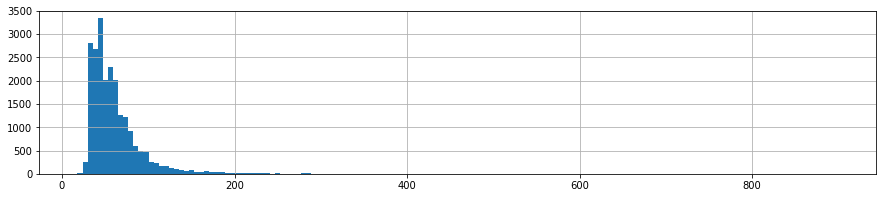

In [29]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

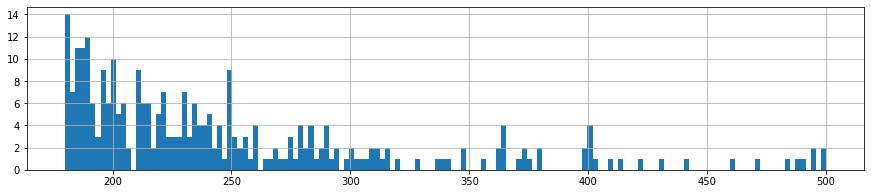

In [30]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

In [31]:
# check
data.total_area.value_counts(bins =20)

(17.116999999999997, 62.1]    14566
(62.1, 106.2]                  6078
(106.2, 150.3]                  968
(150.3, 194.4]                  301
(194.4, 238.5]                  105
(238.5, 282.6]                   51
(282.6, 326.7]                   28
(370.8, 414.9]                   15
(326.7, 370.8]                   13
(459.0, 503.1]                    9
(414.9, 459.0]                    3
(591.3, 635.4]                    3
(503.1, 547.2]                    2
(547.2, 591.3]                    1
(855.9, 900.0]                    1
(635.4, 679.5]                    0
(679.5, 723.6]                    0
(723.6, 767.7]                    0
(767.7, 811.8]                    0
(811.8, 855.9]                    0
Name: total_area, dtype: int64

In [32]:
# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,29.20,2.50,0.00,"1,070,000.00",13.10,5.00,1.00,2.00
0.5,2.00,53.00,2.65,76.00,"4,700,000.00",30.20,9.10,4.00,9.00
0.9,3.00,94.14,3.00,430.00,"11,000,000.00",53.50,15.10,13.00,22.00
0.9976,7.00,309.96,4.00,"1,279.71","81,994,272.00",178.76,47.86,25.00,27.00


In [33]:
data = data.loc[data['rooms']<8]
data = data.loc[data['rooms']>0]
data = data.loc[data['total_area']<300]

data = data.loc[data['ceiling_height']<5]
data = data.loc[data['ceiling_height']>2]

data = data.loc[data['living_area']<180]

data = data.loc[data['kitchen_area']<22]
data = data.loc[data['kitchen_area']>3]
#print(data.shape[0])
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

# data.total_area.value_counts(bins =20)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,29.23,2.50,0.00,"1,050,000.00",13.33,5.00,1.00,2.00
0.5,2.00,52.00,2.65,75.00,"4,600,000.00",30.00,9.00,4.00,9.00
0.9,3.00,88.16,2.96,423.00,"9,813,742.40",51.50,14.00,13.00,22.00
0.9976,6.00,201.48,4.00,"1,276.93","45,996,640.00",125.49,21.10,25.00,27.00


In [34]:
# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,265.00","21,265.00","21,265.00","21,265.00","21,265.00","21,265.00","21,265.00","21,265.00","21,265.00"
min,1.00,21.00,2.25,0.00,"430,000.00",2.00,3.20,1.00,1.00
max,7.00,295.00,4.80,"1,580.00","159,984,000.00",177.00,21.90,33.00,60.00


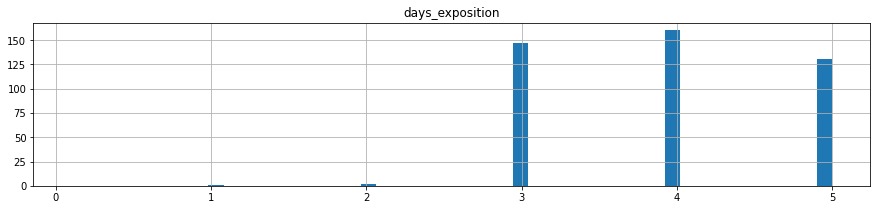

In [35]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0.1,5));

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21265 entries, 1 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21265 non-null  int64         
 1   last_price            21265 non-null  float64       
 2   total_area            21265 non-null  float64       
 3   first_day_exposition  21265 non-null  datetime64[ns]
 4   rooms                 21265 non-null  int64         
 5   ceiling_height        21265 non-null  float64       
 6   floors_total          21265 non-null  int64         
 7   living_area           21265 non-null  float64       
 8   floor                 21265 non-null  int64         
 9   is_apartment          21265 non-null  bool          
 10  studio                21265 non-null  bool          
 11  open_plan             21265 non-null  bool          
 12  kitchen_area          21265 non-null  float64       
 13  balcony         

In [37]:
# Работа с редкими и выбивающимися значениями
# 'rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floors_total'
# 'last_price','rooms',
# Функция для подсчёта границ с учетом 1.5 размаха
# def quartile_range(df, column):
#     q1 = df[column].quantile(0.25)
#     q3 = df[column].quantile(0.75)
#     iqr = q3 - q1
#    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
#    return dfq
# Столбцы с выбросами
#list_features = ['total_area', 'ceiling_height', 'days_exposition',  'living_area',  'kitchen_area', 'floors_total']
#list_features = ['ceiling_height']
#for col in list_features:
#    data[col] = quartile_range(data, col)

# Изучаем, есть ли выбивающиеся значения
#data.describe()

In [38]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,265.00","21,265.00","21,265.00","21,265.00","21,265.00","21,265.00","21,265.00","21,265.00","21,265.00"
min,1.00,21.00,2.25,0.00,"430,000.00",2.00,3.20,1.00,1.00
max,7.00,295.00,4.80,"1,580.00","159,984,000.00",177.00,21.90,33.00,60.00


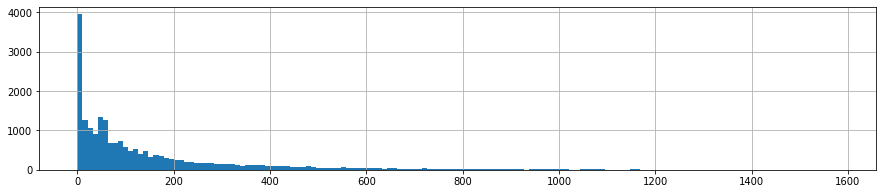

In [39]:
# check
data.days_exposition.hist(bins = 150, figsize = (15,3));

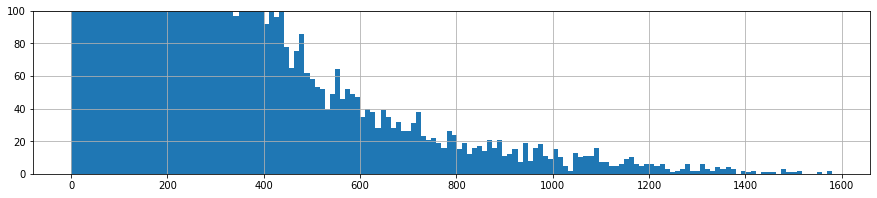

In [40]:
# check
data.days_exposition.hist(bins = 150, figsize = (15,3))
plt.ylim(0, 100);

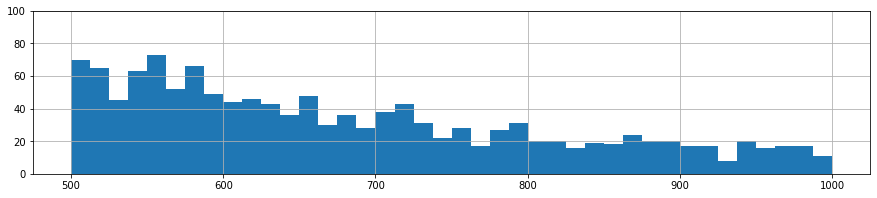

In [41]:
# check
data.days_exposition.hist(bins = 40, figsize = (15,3), range = (500,1000))
plt.ylim(0, 100);

In [42]:
# check
data[data.days_exposition > 1000]['days_exposition'].count()

238

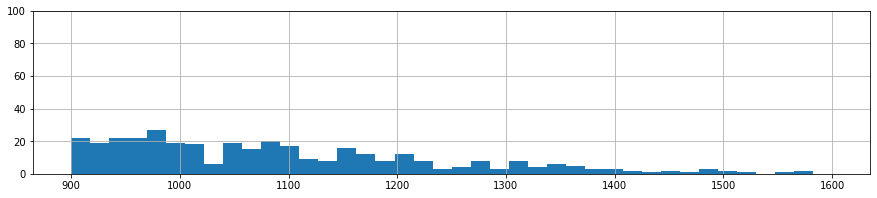

In [43]:
# check
data.days_exposition.hist(bins = 40, figsize = (15,3), range = (900,1600))
plt.ylim(0, 100);

In [44]:
# check
data = data[(data.days_exposition <= 1000) | (data.days_exposition.isna())]

In [45]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21027 entries, 1 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21027 non-null  int64         
 1   last_price            21027 non-null  float64       
 2   total_area            21027 non-null  float64       
 3   first_day_exposition  21027 non-null  datetime64[ns]
 4   rooms                 21027 non-null  int64         
 5   ceiling_height        21027 non-null  float64       
 6   floors_total          21027 non-null  int64         
 7   living_area           21027 non-null  float64       
 8   floor                 21027 non-null  int64         
 9   is_apartment          21027 non-null  bool          
 10  studio                21027 non-null  bool          
 11  open_plan             21027 non-null  bool          
 12  kitchen_area          21027 non-null  float64       
 13  balcony         

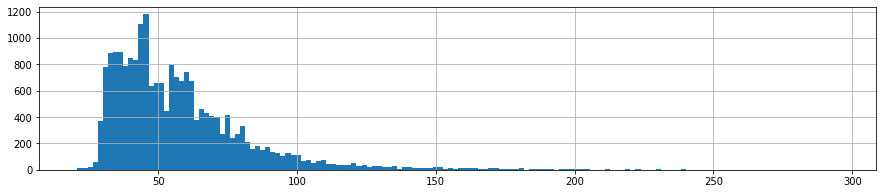

In [46]:
data.reset_index()
data.total_area.hist(bins = 150, figsize = (15,3));

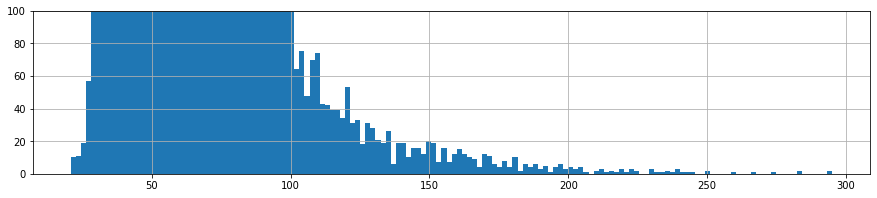

In [47]:
data.total_area.hist(bins = 150, figsize = (15,3))
plt.ylim(0, 100);

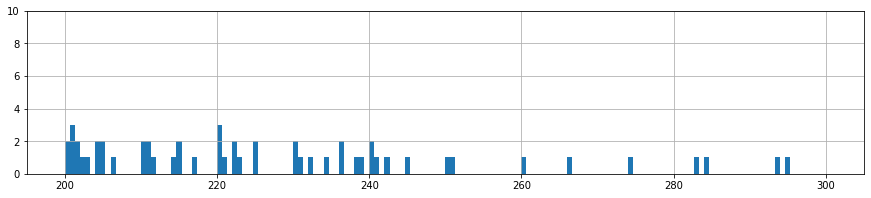

In [48]:
data.total_area.hist(bins = 150, figsize = (15,3), range = (200,300))
plt.ylim(0, 10);

In [49]:
data[data.total_area > 240]['total_area'].count()

12

In [50]:
data = data[(data.total_area <= 240) | (data.total_area.isna())]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21015 entries, 1 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21015 non-null  int64         
 1   last_price            21015 non-null  float64       
 2   total_area            21015 non-null  float64       
 3   first_day_exposition  21015 non-null  datetime64[ns]
 4   rooms                 21015 non-null  int64         
 5   ceiling_height        21015 non-null  float64       
 6   floors_total          21015 non-null  int64         
 7   living_area           21015 non-null  float64       
 8   floor                 21015 non-null  int64         
 9   is_apartment          21015 non-null  bool          
 10  studio                21015 non-null  bool          
 11  open_plan             21015 non-null  bool          
 12  kitchen_area          21015 non-null  float64       
 13  balcony         

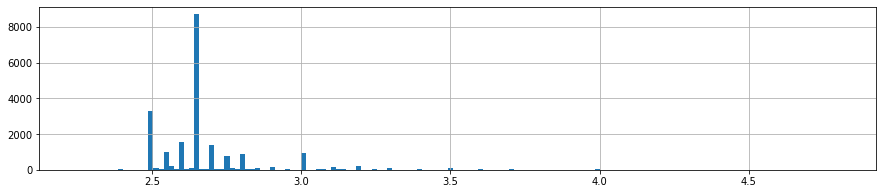

In [51]:
#'ceiling_height', 'living_area',  'kitchen_area', 'floors_total'
data.reset_index()
data.ceiling_height.hist(bins = 150, figsize = (15,3));

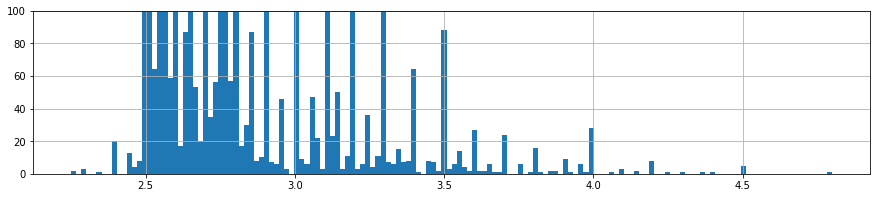

In [52]:
data.ceiling_height.hist(bins = 150, figsize = (15,3))
plt.ylim(0, 100);

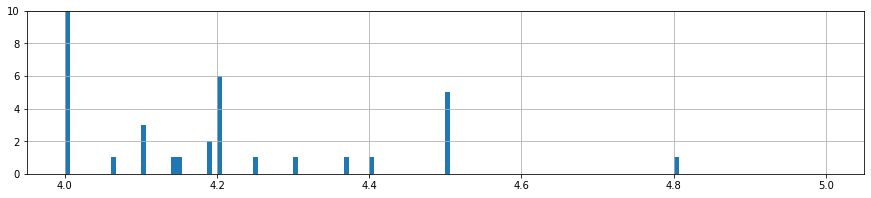

In [53]:
data.ceiling_height.hist(bins = 150, figsize = (15,3), range = (4,5))
plt.ylim(0, 10);

В сталинских высотках и со вторым светом могут быть такие потолки.

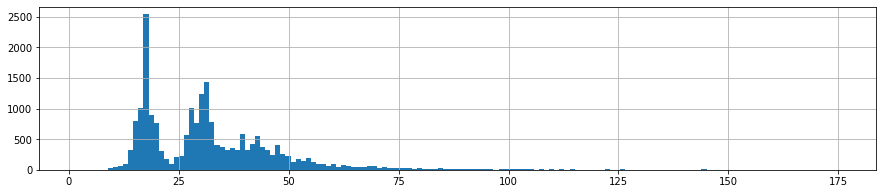

In [54]:
# 'living_area'
data.reset_index()
data.living_area.hist(bins = 150, figsize = (15,3));

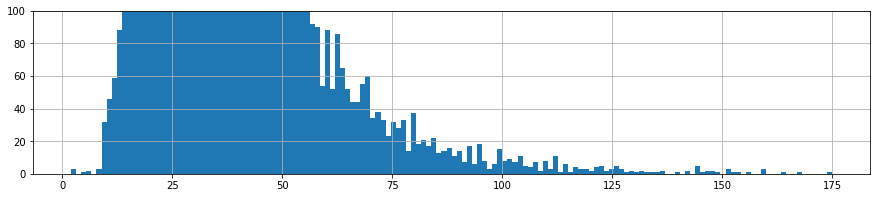

In [55]:
data.living_area.hist(bins = 150, figsize = (15,3))
plt.ylim(0, 100);

12

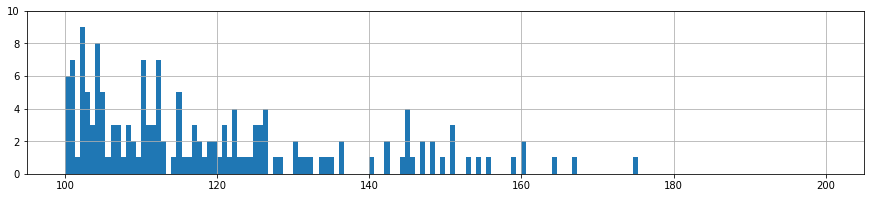

In [56]:
data.living_area.hist(bins = 150, figsize = (15,3), range = (100,200))
plt.ylim(0, 10);
data[data.living_area > 150]['living_area'].count()

In [57]:
data = data[(data.living_area <= 150) | (data.living_area.isna())]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21003 entries, 1 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21003 non-null  int64         
 1   last_price            21003 non-null  float64       
 2   total_area            21003 non-null  float64       
 3   first_day_exposition  21003 non-null  datetime64[ns]
 4   rooms                 21003 non-null  int64         
 5   ceiling_height        21003 non-null  float64       
 6   floors_total          21003 non-null  int64         
 7   living_area           21003 non-null  float64       
 8   floor                 21003 non-null  int64         
 9   is_apartment          21003 non-null  bool          
 10  studio                21003 non-null  bool          
 11  open_plan             21003 non-null  bool          
 12  kitchen_area          21003 non-null  float64       
 13  balcony         

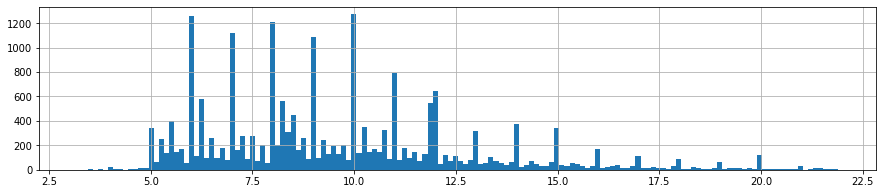

In [58]:
# 'kitchen_area'
data.reset_index()
data.kitchen_area.hist(bins = 150, figsize = (15,3));

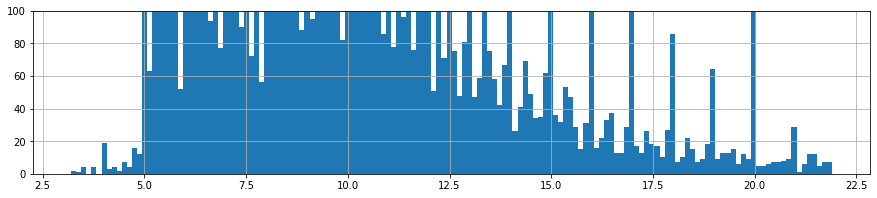

In [59]:
data.kitchen_area.hist(bins = 150, figsize = (15,3))
plt.ylim(0, 100);

11

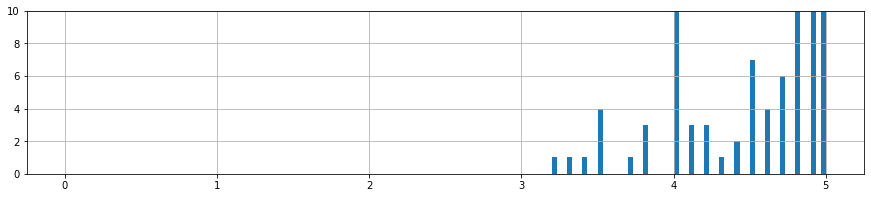

In [60]:
data.kitchen_area.hist(bins = 150, figsize = (15,3), range = (0,5))
plt.ylim(0, 10);
data[data.kitchen_area < 4]['kitchen_area'].count()

In [61]:
data = data[(data.kitchen_area >= 4) | (data.kitchen_area.isna())]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20992 entries, 1 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20992 non-null  int64         
 1   last_price            20992 non-null  float64       
 2   total_area            20992 non-null  float64       
 3   first_day_exposition  20992 non-null  datetime64[ns]
 4   rooms                 20992 non-null  int64         
 5   ceiling_height        20992 non-null  float64       
 6   floors_total          20992 non-null  int64         
 7   living_area           20992 non-null  float64       
 8   floor                 20992 non-null  int64         
 9   is_apartment          20992 non-null  bool          
 10  studio                20992 non-null  bool          
 11  open_plan             20992 non-null  bool          
 12  kitchen_area          20992 non-null  float64       
 13  balcony         

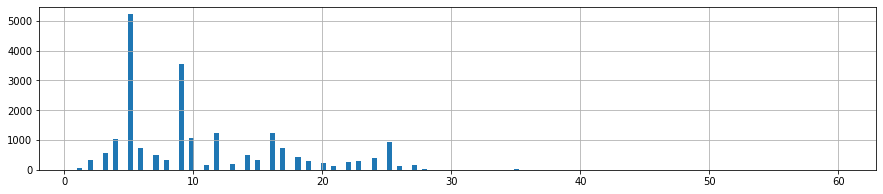

In [62]:
# 'floors_total'
data.reset_index()
data.floors_total.hist(bins = 150, figsize = (15,3));

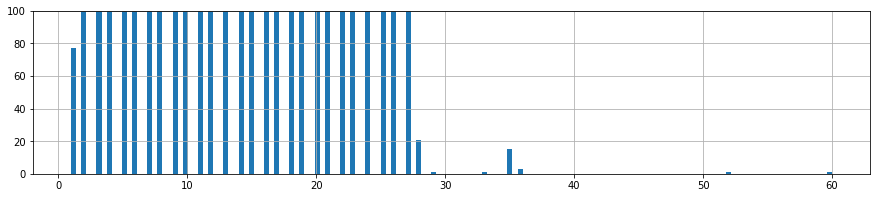

In [63]:
data.floors_total.hist(bins = 150, figsize = (15,3))
plt.ylim(0, 100);

2

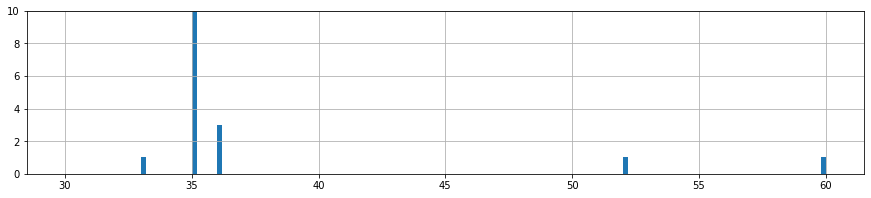

In [64]:
data.floors_total.hist(bins = 150, figsize = (15,3), range = (30,60))
plt.ylim(0, 10);
data[data.floors_total > 40]['floors_total'].count()

In [65]:
data = data[(data.floors_total <= 40) | (data.floors_total.isna())]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20990 entries, 1 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20990 non-null  int64         
 1   last_price            20990 non-null  float64       
 2   total_area            20990 non-null  float64       
 3   first_day_exposition  20990 non-null  datetime64[ns]
 4   rooms                 20990 non-null  int64         
 5   ceiling_height        20990 non-null  float64       
 6   floors_total          20990 non-null  int64         
 7   living_area           20990 non-null  float64       
 8   floor                 20990 non-null  int64         
 9   is_apartment          20990 non-null  bool          
 10  studio                20990 non-null  bool          
 11  open_plan             20990 non-null  bool          
 12  kitchen_area          20990 non-null  float64       
 13  balcony         

In [98]:

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"20,990.00","20,990.00","20,990.00","20,990.00","20,990.00","20,990.00","20,990.00","20,990.00","20,990.00"
min,1.00,21.10,2.25,0.00,"430,000.00",2.00,4.00,1.00,1.00
max,7.00,240.00,4.80,"1,000.00","130,000,000.00",149.40,21.90,33.00,36.00


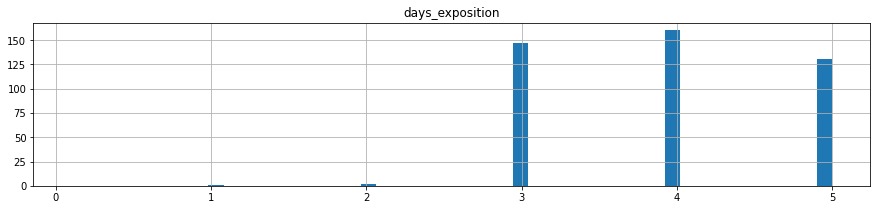

In [100]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0.1,5));

### Посчитаем и добавим в таблицу новые столбцы

•	цена одного квадратного метра;

•	день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

•	месяц публикации объявления;

•	год публикации объявления;

•	тип этажа квартиры (значения — «‎первый», «последний», «другой»);

•	расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [66]:
# Добавляем столбец со стоимостью квадратного метра (one_m_price) и приводим его в целочисленный тип
data['one_m_price'] = data['last_price'] / data['total_area']
data['one_m_price'] = data['one_m_price'].astype(int)

# Добавляем столбцы дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# Создаём функцию для заполнения нового столбца с типом этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

# расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
data['cityCenters_nearest'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype(int)
print(data['cityCenters_nearest'].max())
data.sample(10)

65


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_m_price,weekday,month,year,floor_type
10813,0,3100000.0,44.00,2017-11-29,2,2.50,5,28.20,3,False,...,0,454.0,0,502.0,130.0,70454,2,11,2017,другой
18086,1,3850000.0,85.40,2018-02-24,3,3.00,3,50.50,2,False,...,0,454.0,0,502.0,0.0,45081,5,2,2018,другой
11350,0,4650000.0,58.20,2016-03-29,3,2.50,9,39.80,4,False,...,0,454.0,0,502.0,370.0,79896,1,3,2016,другой
14284,2,12500000.0,76.50,2017-05-26,2,3.00,8,36.30,8,False,...,1,537.0,0,502.0,509.0,163398,4,5,2017,последний
22955,10,2950000.0,37.10,2017-12-06,1,2.70,20,17.00,15,False,...,0,454.0,0,502.0,22.0,79514,2,12,2017,другой
7648,2,4200000.0,55.30,2019-04-23,2,3.00,15,35.00,7,False,...,0,454.0,0,502.0,3.0,75949,1,4,2019,другой
20802,18,8900000.0,74.34,2019-04-30,3,3.20,5,48.84,3,False,...,1,347.0,0,502.0,0.0,119720,1,4,2019,другой
10487,0,3050000.0,31.00,2017-12-12,1,2.65,9,15.50,3,False,...,2,193.0,0,502.0,121.0,98387,1,12,2017,другой
13495,9,4500000.0,48.00,2018-06-16,1,3.10,5,15.20,5,False,...,0,454.0,2,368.0,12.0,93750,5,6,2018,последний
2425,9,3200000.0,51.20,2017-06-14,1,2.80,9,34.80,6,False,...,0,454.0,0,502.0,45.0,62500,2,6,2017,другой


### Проведем исследовательский анализ данных

#### 	Изучим следующие параметры объектов:

- общая площадь;
жилая площадь;
площадь кухни;

- цена объекта;
количество комнат;
высота потолков;

- этаж квартиры;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;

- расстояние до центра города в метрах;
расстояние до ближайшего аэропорта;
расстояние до ближайшего парка;

- день и месяц публикации объявления.

Построим отдельные гистограммы для каждого из этих параметров. 

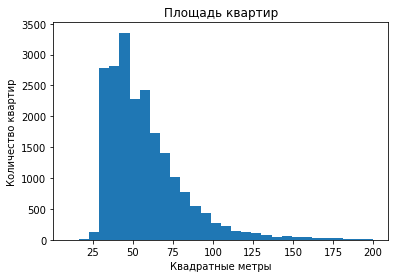

Наибольшие по площади варианты:
2469     240.00
18713    240.00
19964    238.26
6107     236.00
2127     234.00
3146     232.00
13864    231.00
8574     230.00
509      225.00
15785    222.00
Name: total_area, dtype: float64


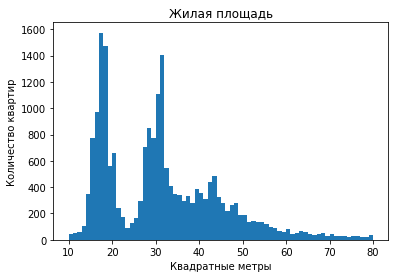

Наибольшие по жилой площади варианты:
8574     149.4
9783     148.0
13864    148.0
11800    147.2
11438    147.0
18790    145.4
7444     145.0
22420    145.0
16199    145.0
5451     145.0
Name: living_area, dtype: float64


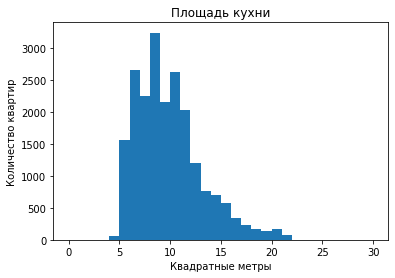

Наибольшие по площади кухни варианты:
13776    21.90
19424    21.90
16959    21.90
3290     21.90
3065     21.87
8050     21.80
11835    21.80
6413     21.76
21734    21.76
23374    21.74
Name: kitchen_area, dtype: float64


In [67]:
# Общая площадь
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(10))

# Жилая площадь
plt.hist(data['living_area'], bins=70, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по жилой площади варианты:')
print(data['living_area'].sort_values(ascending=False).head(10))

# Площадь кухни
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади кухни варианты:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))

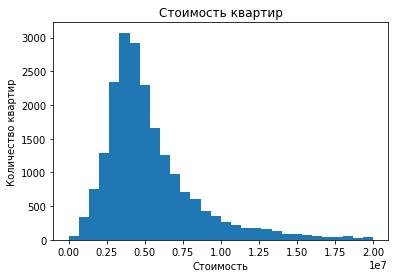

Наибольшие по цене варианты:
13864    130000000.0
4996     124000000.0
16590     98000000.0
509       90000000.0
11430     85000000.0
10362     83820000.0
6462      82000000.0
22804     81960000.0
5232      77612080.0
15726     77349000.0
Name: last_price, dtype: float64


In [68]:
# цена объекта
#data['last_price']=data['last_price'] // 1000
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
#plt.ticklabel_format(axis = 'x', style = 'plain') - заменяет 1е7 на семь нулей
plt.show()

print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head(10))

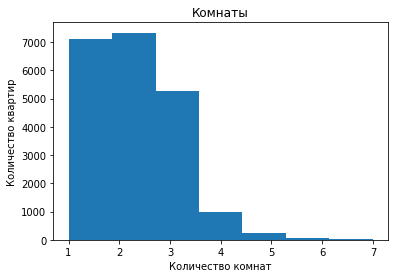

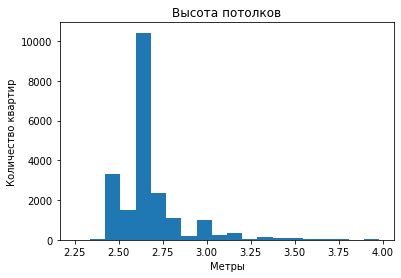

In [69]:
# количество комнат
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
#print('Наибольшие по числу комнат варианты:')
#print(data['rooms'].sort_values(ascending=False).head(10))

# Высота потолков
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
#print('Наибольшие по высоте потолков варианты:')
#print(data['ceiling_height'].sort_values(ascending=False).head(10))

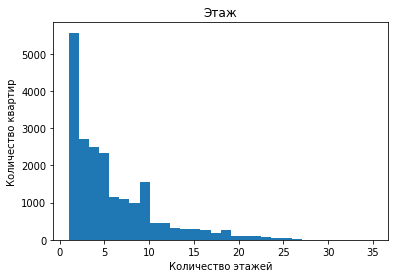

In [70]:
# этаж квартиры; 'floor'
plt.hist(data['floor'], bins=30, range=(1,35))
plt.title('Этаж')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()
#print('Наибольшие по числу этажей варианты:')
#print(data['floor'].sort_values(ascending=False).head(10))

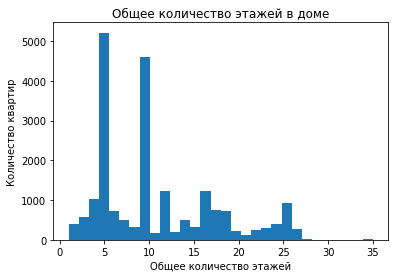

In [71]:
# общее количество этажей в доме; floors_total
plt.hist(data['floors_total'], bins=30, range=(1,35))
plt.title('Общее количество этажей в доме')
plt.xlabel('Общее количество этажей')
plt.ylabel('Количество квартир')
plt.show()
#print('Наибольшие по числу этажей варианты:')
#print(data['floor'].sort_values(ascending=False).head(10))

<AxesSubplot:>

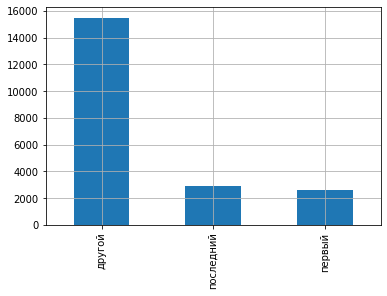

In [72]:
# тип этажа квартиры («первый», «последний», «другой»); 'floor_type'
data['floor_type'].value_counts().plot(kind='bar', grid=True)


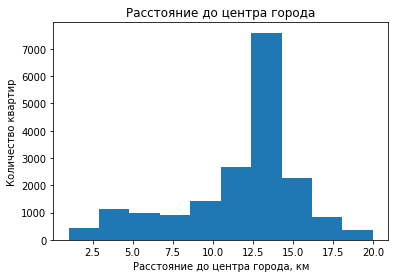

In [73]:
# расстояние до центра города в метрах; 
plt.hist(data['cityCenters_nearest'], bins=10, range=(1,20))
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Количество квартир')
plt.show()
#print('Наиболее удаленные варианты:')
#print(data['rooms'].sort_values(ascending=False).head(10))

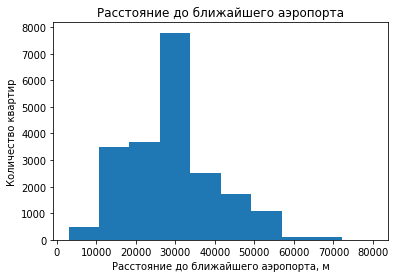

In [74]:
# расстояние до ближайшего аэропорта; 
plt.hist(data['airports_nearest'], bins=10, range=(3000,80000))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта, м')
plt.ylabel('Количество квартир')
plt.show()
#print('Наиболее удаленные варианты:')
#print(data['airports_nearest'].sort_values(ascending=False).head(10))

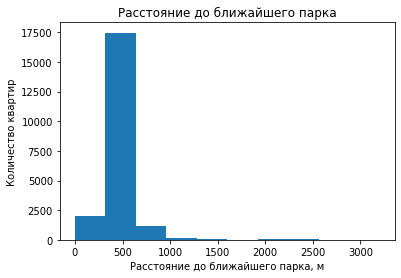

In [75]:
# расстояние до ближайшего парка;
plt.hist(data['parks_nearest'], bins=10, range=(1,3200))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка, м')
plt.ylabel('Количество квартир')
plt.show()
#print('Наиболее удаленные варианты:')
#print(data['parks_nearest'].sort_values(ascending=False).head(10))

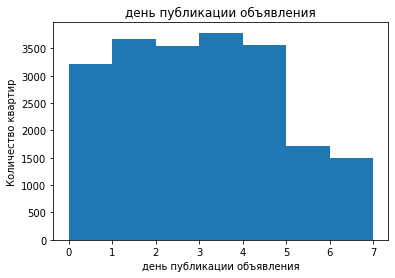

In [76]:
# день публикации объявления.
plt.hist(data['weekday'], bins=7, range=(0,7))
plt.title('день публикации объявления')
plt.xlabel('день публикации объявления')
plt.ylabel('Количество квартир')
plt.show()

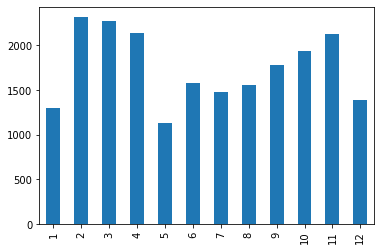

In [78]:
data['month'].value_counts().sort_index().plot.bar();

Вывод

Площадь 
Большинство квартир - менее 100 квадратных метров, больше площадь практически не встречается. В подборке есть несколько очень больших и странных вариантов с площадью более 200 квадратных метров. 
Самое распространенное значение жилой площади – 31 квадратный метр. Несколько пиков вызваны вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной и после этого для 3-комнатной квартиры. После 80 метров встречаются единичные случаи. По площади кухни очень много вариантов от 5 до 12 метров – возможно, в выборке много хрущевок. Больше 20 метров кухни встречаются мало. 

Стоимость. 
В основном стоимость квартир - порядка 4-5 миллионов. Больше 10 миллионов вариантов мало. 
В основном квартиры состоят из 1, 2 и 3 комнат. Есть определенная доля 4-комнатных квартир. 5-ти комнатные встречаются редко, 6-ти и 7-ми комнатные – еще реже. 
Высота потолков Большинство вариантов имеют высоту потолков от 2,5 до 2,8 метров.
Самая распространенная высота – 2.65 м.
Наиболее распространенные этажи квартиры представлены в диапазоне от 1 до 5. Наиболее распространенные варианты находятся в пятиэтажках и девятиэтажках. Тип этажа квартиры в основном представлен не «первый» и не «последний».

Расстояния. 
Наиболее распространенное расстояние до центра города 13 км; 
Наиболее распространенное расстояние до ближайшего аэропорта – 30 км. 
Наиболее распространенное до ближайшего парка – 400-500 м. 

День и месяц публикации объявления. 
Самые распространенные дни публикаций – рабочие. В субботу и воскресенье размещение объявлений происходило практически в два раза реже. Самые распространенные месяцы публикаций – февраль и март, самый редкий – май. 

Самый распространенный месяц публикаций – декабрь.

#### Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
- Построим гистограмму.
- Посчитаем среднее и медиану.

Время продажи (медиана): 74.0
Время продажи (среднее): 145.0809909480705


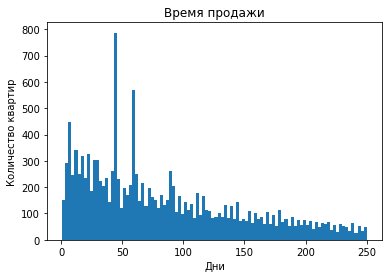

count    18183.000000
mean       167.477864
std        186.868578
min          1.000000
25%         44.000000
50%         95.000000
75%        221.000000
max       1000.000000
Name: days_exposition, dtype: float64

In [79]:
#days_exposition
print('Время продажи (медиана):', data['days_exposition'].median())
print('Время продажи (среднее):', data['days_exposition'].mean())
# Гистограма времени продажи
plt.hist(data.query('days_exposition != 0')['days_exposition'], bins=100, range=(1,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
# Изучаем значения срока продажи
data.query('days_exposition != 0')['days_exposition'].describe()

Вывод.

Медианное время продажи - 94 дня. Среднее время продажи - 179 дней.
В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.

Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - 210 дней (7 месяцев) и дольше.

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'one_m_price', 'weekday', 'month',
       'year', 'floor_type'],
      dtype='object')


count    18183.000000
mean       167.477864
std        186.868578
min          1.000000
25%         44.000000
50%         95.000000
75%        221.000000
max       1000.000000
Name: days_exposition, dtype: float64

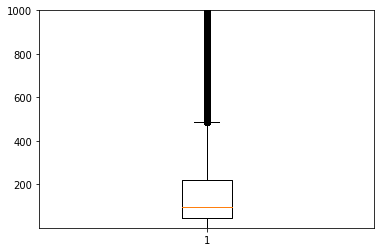

In [80]:
print(data.columns)

#диаграмма размаха
#plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.boxplot(data.query('days_exposition != 0')['days_exposition'])
plt.ylim(1,1000)

#среднее значение, медиана и межквартильный размах
data[data['days_exposition']!=0]['days_exposition'].describe()
#data[data['days_exposition']!=0]['days_exposition'].value_counts()

####	Наиболее влияющие факторы на общую (полную) стоимость объекта.

Изучим, зависит ли цена от:

- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Построим графики, которые покажут зависимость цены от указанных выше параметров. 

Корреляция цены и общей площади:
0.7142799432374597


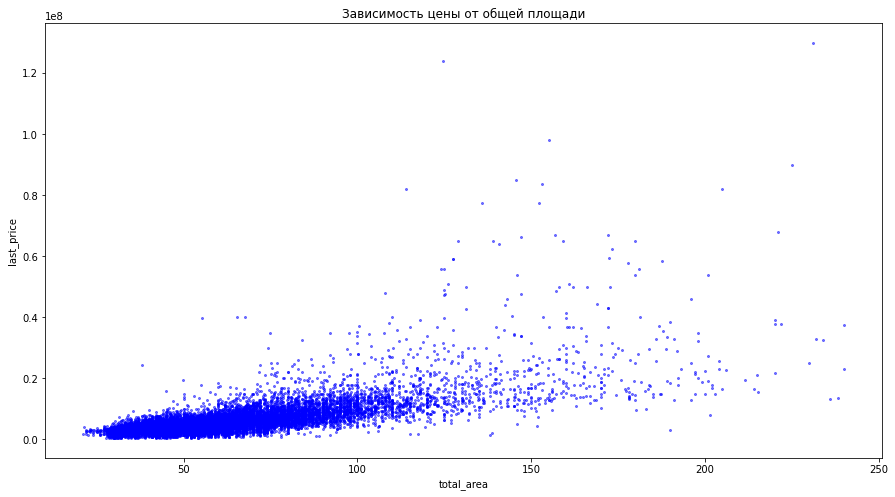

In [81]:
# Зависимость цены от общей площади
data.plot(kind='scatter',
        x='total_area' , y='last_price', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Зависимость цены от общей площади')
print('Корреляция цены и общей площади:')
print(data['last_price'].corr(data['total_area']))

Корреляция цены и жилой площади:
0.582490441300721


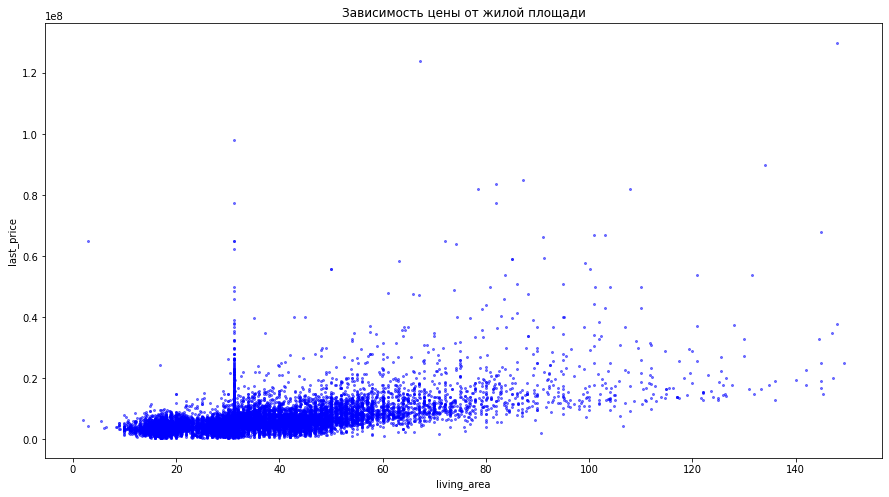

In [82]:
# Зависимость цены от жилой площади
data.plot(kind='scatter',
        x='living_area' , y='last_price', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Зависимость цены от жилой площади')
print('Корреляция цены и жилой площади:')
print(data['last_price'].corr(data['living_area']))

Корреляция цены и площади кухни:
0.4657030790657598


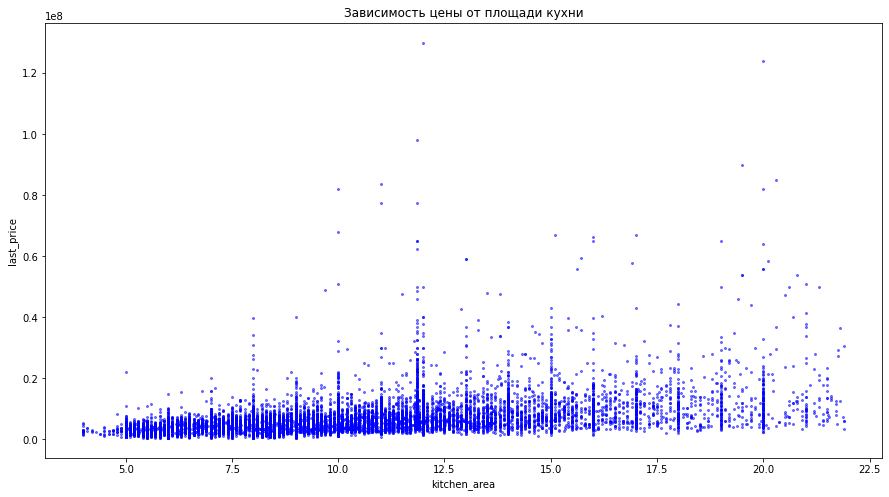

In [83]:
data.plot(kind='scatter',
        x='kitchen_area' , y='last_price', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Зависимость цены от площади кухни')
print('Корреляция цены и площади кухни:')
print(data['last_price'].corr(data['kitchen_area']))

Корреляция цены и количества комнат:
0.43172670183428613


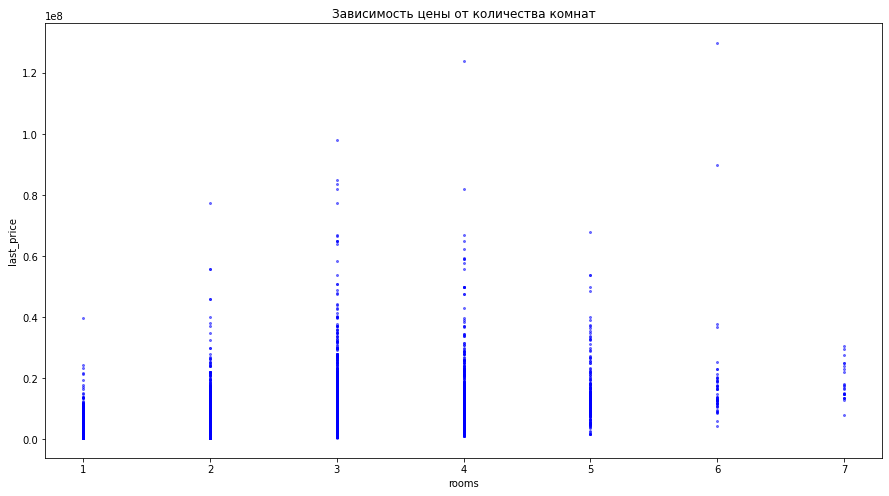

In [85]:
data.plot(kind='scatter',
        x='rooms' , y='last_price', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Зависимость цены от количества комнат')
print('Корреляция цены и количества комнат:')
print(data['last_price'].corr(data['rooms']))


Корреляция цены и этажа:
0.06228741077707249


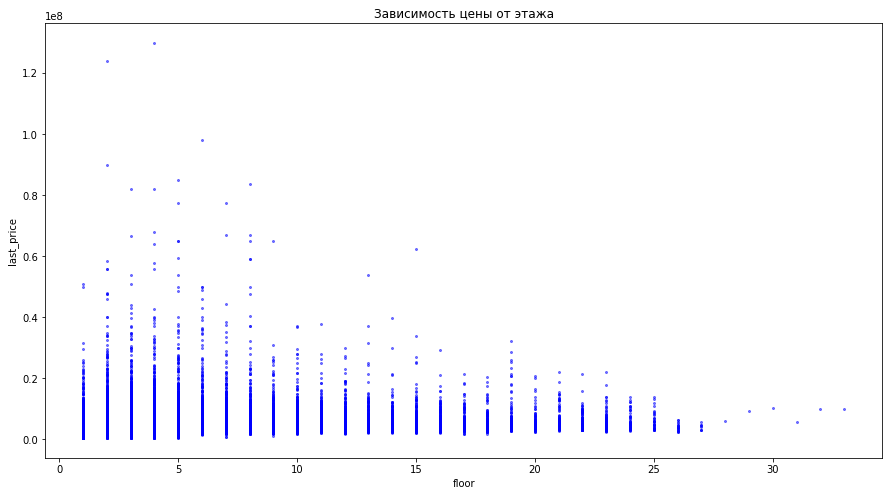

In [86]:
data.plot(kind='scatter',
        x='floor' , y='last_price', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Зависимость цены от этажа')
print('Корреляция цены и этажа:')
print(data['last_price'].corr(data['floor']))

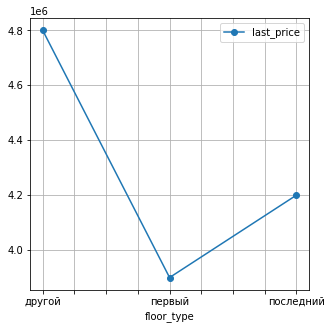

In [87]:
# Зависимость цены от типа этажа
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Корреляция цены и дня недели:
-0.005994567065489578


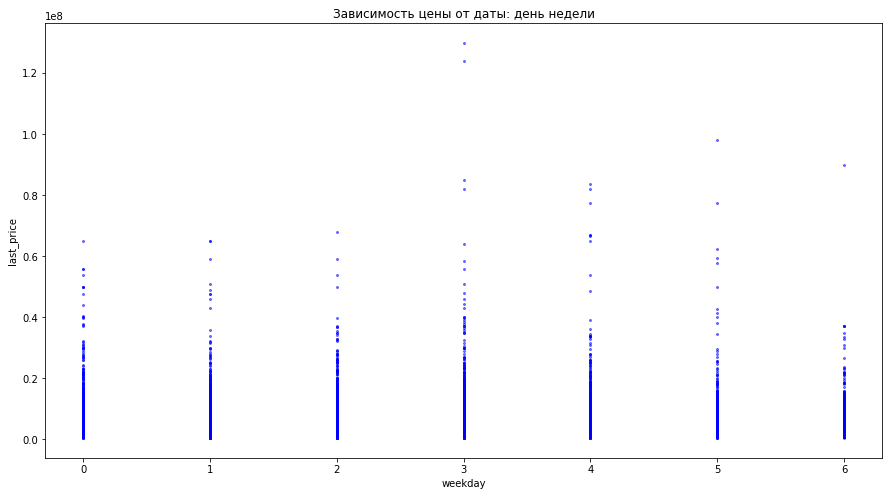

In [88]:
# Зависимость цены от даты размещения: день недели
data.plot(kind='scatter',
        x='weekday' , y='last_price', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Зависимость цены от даты: день недели')
print('Корреляция цены и дня недели:')
print(data['last_price'].corr(data['weekday']))

Корреляция цены и месяца:
0.010080823732079238


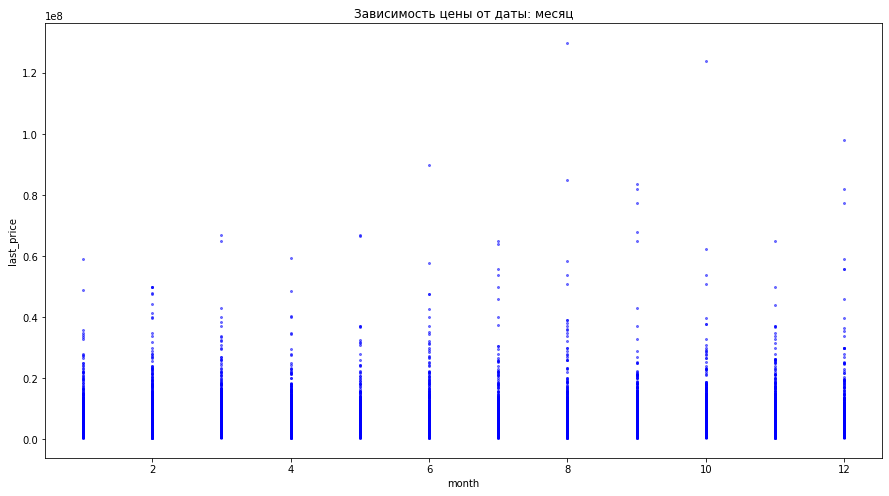

In [89]:
# Зависимость цены от даты размещения месяц
data.plot(kind='scatter',
        x='month' , y='last_price', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Зависимость цены от даты: месяц')
print('Корреляция цены и месяца:')
print(data['last_price'].corr(data['month']))

Корреляция цены и года:
-0.037983711772966236


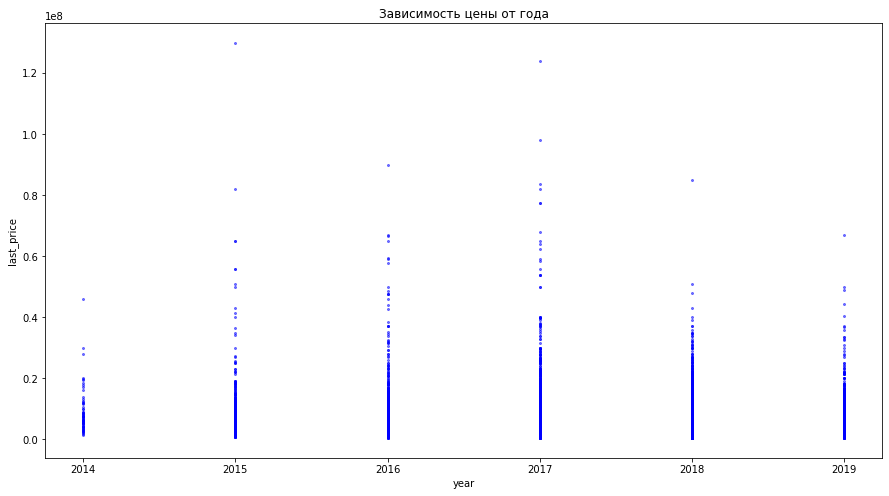

In [90]:
# Зависимость цены от даты размещения год
data.plot(kind='scatter',
        x='year' , y='last_price', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)

#data.plot(grid=True, style='o-',
#        x='year' , y='last_price', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)

plt.title('Зависимость цены от года')
print('Корреляция цены и года:')
print(data['last_price'].corr(data['year']))


4.3. 
Выводы

Чем больше общая площадь, тем выше стоимость. Корреляция этих параметров крайне высокая. Почти такая же корреляция у жилой площади. Зависимость цены от площади кухни невыразительная и нелинейная. 
Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади. 
Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже. Наиболее высокие цены в квартирах, расположенных до 8 этажа. Самый дорогой этаж – 4-й. 
Самые дорогие цены размещаются в четверг. В воскресенье квартиры выставляются в целом дешевле, чем в остальные дни. 
Зависимости цены от месяца размещения как таковой нет. Самая высока стоимость размещения была в августе.
Самые высокие цены были в 2015 г. 

#### 	Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [91]:
#print(data['one_m_price'].max()) # 1907500
#print(data['one_m_price'].min()) # 111
# {:.0f} - количество знаков после запятой 
pd.set_option('display.float_format', '{:.0f}'.format)

data.groupby('locality_name').agg({'total_images':'count', 'one_m_price': 'mean'})\
.rename(columns = {'total_images': 'Число объявлений'})\
.sort_values(by = 'Число объявлений', ascending = False).head(10)


,Число объявлений,one_m_price
locality_name,,
санкт-петербург,13787,110687
поселок мурино,473,84343
поселок шушары,414,77816
всеволожск,359,68545
пушкин,325,101626
колпино,317,75121
поселок парголово,315,90037
гатчина,295,68424
деревня кудрово,249,92002


Вывод
Населенные пункты с самой высокой стоимостью квадратного метра - Санкт-Петербург и Пушкин. 
Населенный пункт с самой низкой стоимостью квадратного метра - Выборг. 

#### 	Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. 

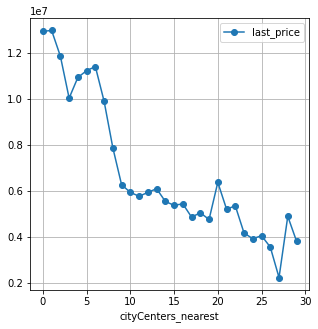

In [92]:

(
    data.query('locality_name == "санкт-петербург"').pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()


Вывод
Стоимость при удалении от центра резко падает и остается высокой для квартир до 9 км от центра. Далее при увеличении расстояния стоимость падает не сильно. 

In [93]:
### Общий вывод

### Общий вывод 
**В представленном отчете проведен исследовательский анализ данных. Первоначальные данные были проверены на пропуски, дубликаты и аномальные значения. Для более широкого анализа были добавлены столбцы с рассчитанными данными: цена одного квадратного метра, день, месяц и год публикации объявления, тип этажа квартиры и расстояние до центра города в километрах. Параметры объектов были изучены: построены гистограммы, выявлены зависимости и сделаны выводы.** 

**Медианное время продажи - 94 дня. Среднее время продажи - 179 дней. В основном квартиры продаются за срок в 100 дней. Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - 210 дней (7 месяцев) и дольше.** 

**На стоимость объявления больше всего влияет площадь квартиры, нежели число комнат.  Квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко. Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого. Большинство вариантов имеют высоту потолков от 2,5 до 2,8 метров. Наиболее распространенные варианты находятся в пятиэтажках. Самое распространенное значение жилой площади – 31 квадратный метр.**

**Самые распространенные дни публикаций – рабочие, самый «дорогой» день - четверг. В воскресенье размещение объявлений происходило практически в два раза реже и цены дешевле, чем в рабочие.** 

**Самые распространенные месяцы публикаций – февраль и март, самый редкий – май. Самая высокая стоимость размещения была в августе. Цены на квартиры были наиболее высокими в 2015 году.**

**Населенные пункты с самой высокой стоимостью квадратного метра - Санкт-Петербург и Пушкин. 
Населенный пункт с самой низкой стоимостью квадратного метра - Выборг.**

**Стоимость квартиры при удалении от центра резко падает, но остается высокой для квартир с удалением до 9 км от центра. Далее при увеличении расстояния стоимость уменьшается незначительно.**